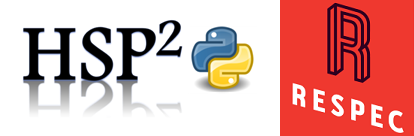

Introduction to Running the Hydrological Simulation Program in Python (HSP2)
========

This Jupyter Notebook provides an introduction the [HSP2 watershed model](https://github.com/respec/HSPsquared) by interactively running a simple test model.

To learn more about HSP2 and its roots in the widely used [Hydrological Simulation Program - FORTRAN (HSPF)](https://www.epa.gov/ceam/hydrological-simulation-program-fortran-hspf), please look over the following background material.
- [Wiki Home & HSP2 Goals](https://github.com/respec/HSPsquared/wiki)
- [About-HSPF](https://github.com/respec/HSPsquared/wiki/About-HSPF)
- [Why-HSP2?](https://github.com/respec/HSPsquared/wiki/Why-HSP2%3F)
- [HSP2 Design Details](https://github.com/respec/HSPsquared/wiki/HSP2_Design_Details)

# Installation and Setup

## Install HSP2

Carefully follow our **[Installation Instructions](https://github.com/respec/HSPsquared#installation)**, especially including:
- Creating a virtual environment for HSP2 (step 3)
- Adding HSPsquared to your Python path (step 4)

In [1]:
# Confirm that your active environment for this notebook is the one you created for HSP2.
import os
os.environ['CONDA_DEFAULT_ENV']

'hsp2_py38'

## Import Python Dependencies
- Most dependancies get installed when you import the `HSP2` and `HSP2tools` modules. 

In [2]:
import os
from pathlib import Path

import tables

import HSP2
import HSP2tools
import HSP2IO.io
import HSP2IO.hdf

# Confirm installed versions of HSP2 and key dependencies
HSP2.versions(['matplotlib', 'tables', 'h5py'])

,version
Python,"3.8.12 | packaged by conda-forge | (default, O..."
HSP2,0.10.1
numpy,1.20.3
numba,0.53.1
pandas,1.2.5
matplotlib,3.5.1
tables,3.6.1
h5py,3.3.0
os,macOS-10.16-x86_64-i386-64bit
processor,i386


### If you get HSP2 `ModuleNotFoundError`:

If you get this error:
```python
ModuleNotFoundError: No module named 'HSP2'
```
Then:
1. Run the following terminal command with your local absolute path to this repo.
    - NOTE: Here we use Jupyter `!` magic command to run from the terminal via this notebook. 
2. Restart the kernel.
3. Rerun the import statements above.

See [Step 4 in the HSP2 Installation Instructions](https://github.com/LimnoTech/HSPsquared#4-add-your-hspsquared-path-to-anaconda-sites-packages).

In [3]:
!conda-develop /Users/aaufdenkampe/Documents/Python/respec.HSPsquared/

path exists, skipping /Users/aaufdenkampe/Documents/Python/respec.HSPsquared
completed operation for: /Users/aaufdenkampe/Documents/Python/respec.HSPsquared


## Set Paths to Input and Output Files with `pathlib`

Use the [pathlib](https://docs.python.org/3/library/pathlib.html) library (built-in to Python 3) to manage paths indpendentely of OS or environment.

This blog post describes `pathlib`'s benefits relative to using the `os` library or manual approaches.
- https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f



In [4]:
# Get your current working directory, for reference
Path.cwd()

PosixPath('/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/examples')

In [5]:
# Set your project directory to your local folder for your clone of the HSPsquared repository

project_folder = Path('/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/')

### Inputs Paths

For this tutorial, we will build our model from the HSPF test cases in the `tests` folder, reading in their input files:
- HSPF User Control Inputs (UCI) Fortran "punchcard" text file
- HSPF Watershed Data Management (WDM) Fortran binary file for timeseries inputs

In [6]:
# Set input data paths, using our Test10 example
    
input_data_folder  = Path('tests/test10/HSP2results/')

input_files = [
    'test10.uci', 
    'test10.wdm', 
]

# HSPF User Control Inputs text file
input_uci_path = project_folder / input_data_folder / input_files[0]

print(input_uci_path)
print('File exists? ' + str(input_uci_path.exists()) )

# HSPF Watershed Data Management Fortran binary file for timeseries inputs
input_wdm_path = project_folder / input_data_folder / input_files[1]

print(input_wdm_path)
print('File exists? ' + str(input_wdm_path.exists()) )

/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/tests/test10/HSP2results/test10.uci
File exists? True
/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/tests/test10/HSP2results/test10.wdm
File exists? True


### Output Paths

In [7]:
# Create temporary data output folder, where you want to store your outputs
    
output_data_folder = Path('examples/_TutorialData')

# Create temporary directory, which we ignore in Git
tutoral_temp_path = project_folder / output_data_folder
tutoral_temp_path.mkdir(parents=True, exist_ok=True)

print('Folder exists? ' + str(tutoral_temp_path.exists()) )

Folder exists? True


In [8]:
# Create path for temporary data output file

output_file = 'test10.h5' # HSP2 data HDF5 binary file, for all inputs and outputs

output_hdf5_path = project_folder / output_data_folder / output_file  # pathlib concatenation

print(output_hdf5_path)
print('File exists? ' + str(output_hdf5_path.exists()) )

# The file path should not yet exist. If it does, delete it for this tutorial.

/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/examples/_TutorialData/test10.h5
File exists? False


# Run HSP2 on Test10

## Process HSPF Inputs for HSP2

These functions will:
- Open HSPF input files
- Convert inputs to Python dictionaries and dataframes for use by HSP2
- Save input data to the HDF5 file specified above
  - creating the HDF5 file if it doesn't exist
  - overwriting the HDF5 file if it does exist
  
NOTE: the `%%time` Jupyter magic function times the execution of the entire cell.

In [9]:
%%time
# Read, convert, and save User Control Input (UCI) information 
# from the HSPF *.uci text file in Fortran punchard format
# to the HDF5 file

HSP2tools.readUCI(input_uci_path, output_hdf5_path)
# NOTE that parsing this text file is not very efficient!

CPU times: user 18.2 s, sys: 621 ms, total: 18.8 s
Wall time: 18.9 s


In [10]:
# The output HDF5 should now exist
print('File exists? ' + str(output_hdf5_path.exists()) )

File exists? True


In [11]:
%%time
# Read, convert, and save timeseries data 
# from the HSPF Watershd Data Management (WDM) file in Fortran binary format 
# to the HDF5 file

HSP2tools.readWDM(input_wdm_path, output_hdf5_path)

39 reading from wdm
41 reading from wdm
42 reading from wdm
46 reading from wdm
113 reading from wdm
119 reading from wdm
121 reading from wdm
122 reading from wdm
123 reading from wdm
124 reading from wdm
125 reading from wdm
126 reading from wdm
127 reading from wdm
131 reading from wdm
132 reading from wdm
134 reading from wdm
135 reading from wdm
136 reading from wdm
140 reading from wdm
CPU times: user 2.88 s, sys: 70.1 ms, total: 2.95 s
Wall time: 3.05 s


,Start,Stop,Freq,Length,TSTYPE,TFILL,STAID,STNAM
TS039,1976-01-01 00:00:00,1977-01-01 00:00:00,1H,8784,PREC,-999.0,HOURLY PREC,PRECIP TRAER IOWA
TS041,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,EVAP,-999.0,DAILY EVAP,FARMERS COOP WEATHER STN
TS042,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,WIND,-999.0,DAILY WIND,FARMERS COOP WEATHER STN
TS046,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,SOLR,-999.0,2 HOUR RAD,FARMERS WEATHER STN
TS113,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0,DAILY FLOW,IOWA RIVER MARSHALLTOWN
TS119,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,FLOW,-999.0,DAILY FLOW,IOWA RIVER MARENGO
TS121,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0,2 HOUR AIR TEMP,CEDAR RAPIDS IOWA
TS122,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0,2 HOUR AIR TEMP,IOWA FALLS IOWA
TS123,1976-01-01 00:00:00,1977-01-01 00:00:00,2H,4392,ATMP,-999.0,2 HOUR AIR TEMP,MARSHALLTOWN IOWA
TS124,1976-01-01 00:00:00,1977-01-01 00:00:00,1D,366,DEWP,-999.0,DAILY DEW PT,CEDAR RAPIDS IOWA


## Create an instance of the HSP2 IO Manager

With HSP2 v0.10 we introduced a new abstracted approach to getting data in and out of HSP2, with the objectives of:
- adding the flexibility to use new performant and cloud-friendly storage formats (i.e. Parquet, Zarr), 
- automating initial model development, and 
- coupling to other models.

At present the HSP2 IO Manager is only used for model executing I/O to a single HDF5.

Our plan is to move toward using the I/O abstracted methods for also reading HSPF UCI and WDM files, but we will maintain both approaches for for several more releases for backward compability. 

For more info, see [issue #59](https://github.com/respec/HSPsquared/issues/59) and [pull request #68](https://github.com/respec/HSPsquared/pull/68).

In [12]:
## Create instance of HSPFIO.HDF5 class, from the file created by reading HSPF inputs

hdf5_instance = HSP2IO.hdf.HDF5(output_hdf5_path)

hdf5_instance

In [13]:
# Note that this class leaves the HDF5 file open for model execution, 
# but we must close it when done. See section 3.5 below for more details.

# This command from the `pyTables` HDF5 library displays all open .h5 files
tables.file._open_files.filenames

['/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/examples/_TutorialData/test10.h5']

In [14]:
## Create an instance of the IOManager: Management class for IO operations needed to execute the HSP2 model

io_manager = HSP2IO.io.IOManager(hdf5_instance)

io_manager

In [15]:
# Get information on the `io_manager` object using the `?` ipython magic command
io_manager?

Type:           IOManager
String form:    <HSP2IO.io.IOManager object at 0x7fb4e83e4f40>
File:           ~/Documents/Python/respec.HSPsquared/HSP2IO/io.py
Docstring:      Management class for IO operations needed to execute the HSP2 model
Init docstring:
io_combined: SupportsReadUCI & SupportsReadTS & SupportsWriteTS & SupportsWriteLogging / None 
        Intended to allow users with a object that combines protocols for 
        UCI, Input, Output and Log a shortcut where only a 
        single argument needs to be provided. If UCI, Input, Output and/or 
        Log are not specified this argument will be used as the default.   
uci: SupportsReadUCI/None (Default None)
        A class instance implementing the SupportReadUCI protocol. 
        This class acts as the data source for UCI information. 
        The argument io_combined be used in place by default if this argument is not specified.
input: SupportsReadUCI/None (Default None)
        A class instance implementing SupportReadT

## Run HSP2 simulation for Test10

This function will:
- Read HSP2 inputs from the HDF5 prepared in the processing steps above.
- Compile selected code blocks using numba just-in-time (JIT) compilation.
- Execute the HSP2 model simulation on those inputs, in memory.
- Print timestamps as each model section is run for each model segment.
- Save model results to the same HDF5 file that contains the inputs.

In [16]:
%%time
# This model should take 2-4 minutes to run the first time
HSP2.main(io_manager, saveall=False)

2022-06-23 10:03:45.64   Processing started for file ./; saveall=False
2022-06-23 10:03:51.39   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2022-06-23 10:03:51.39      PERLND P001 DELT(minutes): 60
2022-06-23 10:03:53.14         SNOW
2022-06-23 10:03:54.27         PWATER
2022-06-23 10:03:54.84         PSTEMP
2022-06-23 10:03:54.85         PWTGAS
2022-06-23 10:03:54.88      RCHRES R001 DELT(minutes): 60
2022-06-23 10:03:54.91         HYDR
2022-06-23 10:03:55.17         ADCALC
2022-06-23 10:03:55.20         CONS
2022-06-23 10:03:55.53         HTRCH
2022-06-23 10:03:55.56         SEDTRN
2022-06-23 10:03:55.62         RQUAL
2022-06-23 10:03:56.53         GQUAL
2022-06-23 10:03:57.72      GENER G001 DELT(minutes): 60
GENER 'G001' encountered unsupported feature during initialization and may not function correctly. Unsupported feature: 'Invalid SVOL. GENER module does not currently support reading TimeSeries for 'RCHRES''
2022-06-23 10:03:57.72      RCHRES R002 DELT(minu

The *optional* `saveall` argument is only used to specify whether or not to save all computed timeseries into the HDF5. 
- `saveall = False` is the default if not specified. It writes to a dataframe all timeseries required by other activites and for the linkage between PERLND, IMPLND, and RCHRES segments, but it only saves a timeseries to file storage if it has the `'SAVE'` flag.
- `saveall = True` saves all calculated data to file storage, ignoring the `'SAVE'` flag. This takes more time to complete model execution and increases the size of file storage.

## Rerun block above for faster execution

Note the total run time before and after you rerun the model. You'll notice the model runs much faster the second time.
- During the first model run, numba compiles specified code blocks, then saves the complied code.
- During all subsequent model runs, numba-compiled code is used directly, avoiding the time to compile, saving 1-2 minutes of runtime.

## Close the HDF5 file!

It is important to close the HDF5 file if it is open. Otherwise, you will not be able to read it with other programs and the file will appear corrupted. See: 
- https://www.pytables.org/usersguide/tutorials.html#closing-the-file-and-looking-at-its-content

In [17]:
# List all open HDF5
tables.file._open_files.filenames

['/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/examples/_TutorialData/test10.h5']

In [18]:
# Best practice is to delete the HSP2 IO Manager and HDF5 instances
del io_manager

In [19]:
del hdf5_instance

In [20]:
# These delete methods do not currently also close the HDF5 file
tables.file._open_files.filenames

['/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/examples/_TutorialData/test10.h5']

In [21]:
# Close connections to HDF5 files with this command
tables.file._open_files.close_all()

Closing remaining open files:/Users/aaufdenkampe/Documents/Python/respec.HSPsquared/examples/_TutorialData/test10.h5...done


In [22]:
# Confirm that no HDF5 files remain open
tables.file._open_files.filenames

[]

# Recommended Approach to running HSP2

To insure that all HDF5 files are closed after HSP2 completes a run, we strongly recommend that you run HSP2 using a context managers and Python `with` statements.
- Tutorial for a context manager: https://realpython.com/python-with-statement/

This approach combines the creation of `hdf5_instance` and `io_manager` class objects with running the model, simplifying the overall process.

In [23]:
%%time
# Setup IO Manager and run the model, as recommended,
# all within a Python `with` statement as a context manager

with HSP2IO.hdf.HDF5(output_hdf5_path) as hdf5_instance:
    io_manager = HSP2IO.io.IOManager(hdf5_instance)
    HSP2.main(io_manager, saveall=True)

2022-06-23 10:04:03.69   Processing started for file ./; saveall=True
2022-06-23 10:04:10.12   Simulation Start: 1976-01-01 00:00:00, Stop: 1977-01-01 00:00:00
2022-06-23 10:04:10.12      PERLND P001 DELT(minutes): 60
2022-06-23 10:04:10.21         SNOW
2022-06-23 10:04:10.43         PWATER
2022-06-23 10:04:10.77         PSTEMP
2022-06-23 10:04:10.81         PWTGAS
2022-06-23 10:04:11.00      RCHRES R001 DELT(minutes): 60
2022-06-23 10:04:11.03         HYDR
2022-06-23 10:04:11.17         ADCALC
2022-06-23 10:04:11.18         CONS
2022-06-23 10:04:11.27         HTRCH
2022-06-23 10:04:11.40         SEDTRN
2022-06-23 10:04:11.74         RQUAL
2022-06-23 10:04:14.21         GQUAL
2022-06-23 10:04:16.23      GENER G001 DELT(minutes): 60
GENER 'G001' encountered unsupported feature during initialization and may not function correctly. Unsupported feature: 'Invalid SVOL. GENER module does not currently support reading TimeSeries for 'RCHRES''
2022-06-23 10:04:16.23      RCHRES R002 DELT(minut

In [24]:
# Confirm that no HDF5 files remain open
tables.file._open_files.filenames

[]

# Explore HSP2 Results!

**Congratulations!**  You have run your first HSP2 model!

We'll explore the results in the next two tutorials!